In [1]:
# Instalação e configuração de variaveis ambiente para utilizar Google Drive
# Se utilizar o Colab ajustar para True para instalação dos pre-requisitos
colab = True

if colab==True:
  from google.colab import drive
  drive.mount('/content/drive')

  # Google Drive
  dir_base = "/content/drive/MyDrive/jupyter/pcd_porto_seguro_safe_driver_prediction/data/"
  # raiz
  dir_base_root = "/content/drive/MyDrive/jupyter/pcd_porto_seguro_safe_driver_prediction/"
  import sys
  # caution: path[0] is reserved for script path (or '' in REPL)
  sys.path.append(dir_base_root)

  # Insalar depedências


else:
  # Diretorio da base dos dados
  # Local PC
  dir_base = "data/"


Mounted at /content/drive


# Feature Selection

In [2]:
# Importando as bibliotecas utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import pod_academy_functions as pod

-----------------------------------------------------
------------ PoD Academy Functions ------------------
Só Alegria!
Você está usando o pacote de funções da PoD Academy
Turma: 2023
Autor: PoD Academy
Professor: Bruno Jardim
Versão: 1.0.0
Data: 08/10/2023
-----------------------------------------------------


In [3]:
# Carrega os dados para processo de feature selection
abt_00 = pd.read_csv(dir_base + 'abt_train.csv')

In [4]:
abt_00.head()

,Unnamed: 0,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_05_cat_1.0,ps_car_07_cat_0.9479847665595149,ps_car_07_cat_1.0,ps_ind_04_cat_0.4173684372663293,ps_ind_04_cat_1.0,ps_car_02_cat_0.8302751137556877,ps_car_02_cat_1.0,ps_car_08_cat_1,id,target
0,510263,0.553925,-0.543007,1.321585,-0.311952,-0.805988,-0.587013,2.256576,-0.47767,-0.019446,...,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,1274939,0
1,566227,-0.957891,-0.543007,0.211296,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,...,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,1415654,0
2,154123,-0.453952,0.961267,-0.898992,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,...,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,385376,1
3,500653,1.561802,-0.543007,-0.158800,-0.311952,-0.805988,1.703539,-0.443149,-0.47767,-0.019446,...,-0.63978,7.153559,-3.639785,-0.012298,-0.846265,-0.002366,-2.211725,0.448929,1251174,0
4,362160,-0.957891,-0.543007,-1.269089,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,...,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,-2.211725,0.448929,904785,0


In [5]:
abt_00.drop(axis=1, columns=['Unnamed: 0', 'id'], inplace=True)
abt_00.shape

(357127, 61)

In [6]:
abt_00.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_05_cat_0.5261814898236643,ps_car_05_cat_1.0,ps_car_07_cat_0.9479847665595149,ps_car_07_cat_1.0,ps_ind_04_cat_0.4173684372663293,ps_ind_04_cat_1.0,ps_car_02_cat_0.8302751137556877,ps_car_02_cat_1.0,ps_car_08_cat_1,target
0,0.553925,-0.543007,1.321585,-0.311952,-0.805988,-0.587013,2.256576,-0.47767,-0.019446,-0.041262,...,1.109956,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,0
1,-0.957891,-0.543007,0.211296,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,-0.041262,...,-0.900937,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,0
2,-0.453952,0.961267,-0.898992,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,-0.041262,...,1.109956,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,0.452136,0.448929,1
3,1.561802,-0.543007,-0.158800,-0.311952,-0.805988,1.703539,-0.443149,-0.47767,-0.019446,-0.041262,...,-0.900937,-0.63978,7.153559,-3.639785,-0.012298,-0.846265,-0.002366,-2.211725,0.448929,0
4,-0.957891,-0.543007,-1.269089,-0.311952,1.240714,-0.587013,-0.443149,-0.47767,-0.019446,-0.041262,...,1.109956,-0.63978,-0.139791,0.274741,-0.012298,-0.846265,-0.002366,-2.211725,0.448929,0


In [7]:
X = abt_00.drop(axis=1, columns='target')
y = abt_00.target

# Treinar o modelo com algoritmo Random Forest (foco aqui não é o modelo, e sim seleção de variáveis)
clf = RandomForestClassifier() # escolha aqui o modelo desejado. Podendo ser feito apenas com um modelo.
clf.fit(X,y)

# Mais abaixo será feito com outros para fins de teste e estudos

RandomForestClassifier()

In [8]:
# Importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [9]:
# Lista variaveis e sua importância
features

,Feature,Importance
0,ps_ind_01,0.023452
1,ps_ind_02_cat,0.011083
2,ps_ind_03,0.031837
3,ps_ind_05_cat,0.009021
4,ps_ind_06_bin,0.004358
5,ps_ind_07_bin,0.004841
6,ps_ind_08_bin,0.004889
7,ps_ind_09_bin,0.004394
8,ps_ind_10_bin,0.000128
9,ps_ind_11_bin,0.000329


In [10]:
# Ordenar variaveis por importancia
features = features.sort_values(by='Importance', ascending=True)

In [11]:
# Estabelecer um limite de corte, por exemplo x% da importância máxima
cutoff_max_imp = 0.5

cutoff = cutoff_max_imp * feature_importances.max()

cutoff

0.02912833007811917

In [12]:
# Selecionar variaveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ', len(selected_features))

Número de features selecionadas:  14


In [13]:
# Ordenar variaveis por importância
features = features.sort_values(by='Importance', ascending=True)
features

,Feature,Importance
57,ps_car_02_cat_0.8302751137556877,0.000000
8,ps_ind_10_bin,0.000128
11,ps_ind_13_bin,0.000207
9,ps_ind_11_bin,0.000329
55,ps_ind_04_cat_0.4173684372663293,0.000415
53,ps_car_07_cat_0.9479847665595149,0.001100
10,ps_ind_12_bin,0.001133
12,ps_ind_14,0.001366
24,ps_car_10_cat,0.001530
54,ps_car_07_cat_1.0,0.003657


In [14]:
# Filtrar  o Dataframe para apenas as features selecionadas acima no corte
selected_features_df = features[features['Importance'] > cutoff]
selected_features_df

,Feature,Importance
43,ps_calc_13,0.030146
18,ps_reg_02,0.030202
32,ps_calc_02,0.030734
33,ps_calc_03,0.030797
31,ps_calc_01,0.031153
2,ps_ind_03,0.031837
25,ps_car_11_cat,0.032004
13,ps_ind_15,0.032456
41,ps_calc_11,0.035113
44,ps_calc_14,0.036567


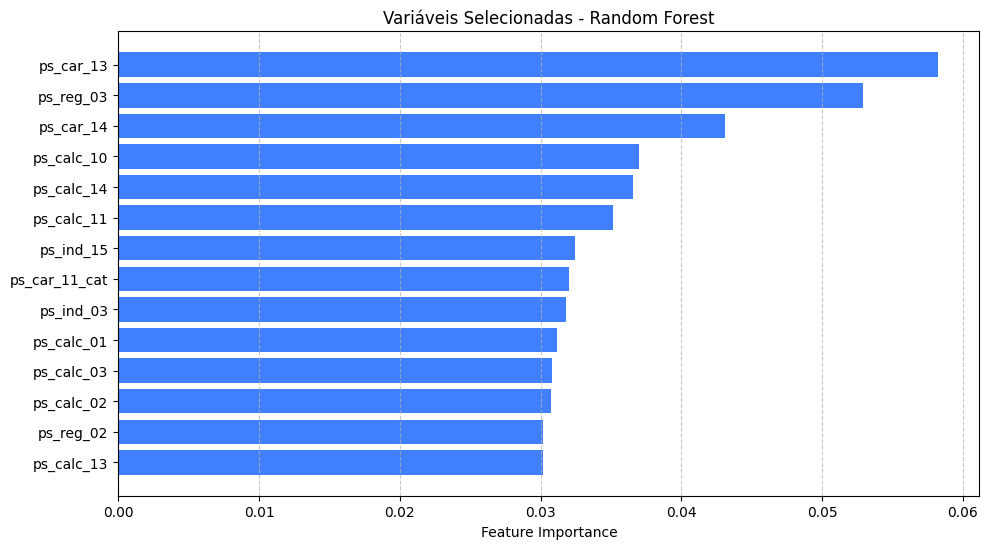

In [15]:
# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

#Plota as features selecionadas para facilitar a visualização
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(.25,.5,1))
plt.xlabel('Feature Importance')
plt.title('Variáveis Selecionadas - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=.7)
plt.tight_layout()
plt.show()

In [16]:
# Salvar a lista de variaveis em um arquivo .pkl
import pickle
with open(dir_base + 'prd_list_features_RandomForestClassifier_FI.pkl', 'wb') as f:
    pickle.dump(selected_features,f)

In [17]:
# Carregar  a lista do arq(dir_base + 'prd_list_features_RandomForestClassifier_FI.pkl', 'wb')uivo .pkl
with open(dir_base + 'prd_list_features_RandomForestClassifier_FI.pkl', 'rb') as f:
    loaded_list = pickle.load(f)
print(loaded_list)

['ps_ind_03', 'ps_ind_15', 'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_13', 'ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_10', 'ps_calc_11', 'ps_calc_13', 'ps_calc_14']


In [18]:
# Cria a lista de variáveis com o target
list_features = loaded_list + ['target']

# Cria um novo Dataframe apenas com as variáveis selecionadas
abt_01 = abt_00[list_features]

# Visualização
abt_01.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,target
0,1.321585,-1.777632,-1.086909,0.281831,-1.459265,-0.616369,1.269533e+00,-0.521373,0.523309,0.522092,0.537574,-1.047586,0.073825,-0.198007,0
1,0.211296,1.042904,-1.086909,-0.684878,1.024187,-1.003274,1.266881e+00,1.219037,-1.566526,1.566821,-0.837398,-0.189968,-0.515582,-0.562370,0
2,-0.898992,0.196743,-0.344937,-1.029515,0.751613,-0.508637,-2.980005e-01,1.567119,1.219920,-0.174393,-0.149912,1.525267,0.073825,1.259443,1
3,-0.158800,1.042904,0.397036,-0.702581,1.266475,4.284008,1.266456e-15,0.174791,0.175003,1.218578,0.537574,-1.476394,0.663231,0.895081,0
4,-1.269089,-1.777632,2.128305,1.029377,-0.490113,-0.116975,-1.882943e-01,0.870955,0.871614,0.870335,-1.181140,0.238841,0.073825,0.530718,0


In [19]:
# Carrega os dados de teste
abt_test = pd.read_csv(dir_base + 'abt_test.csv')
# Remove a coluna desnecessária
abt_test.drop(axis=1, columns=['Unnamed: 0', 'id'], inplace=True)
abt_test.shape

(238085, 61)

In [20]:
# Cria a lista de variáveis com o target
list_features = loaded_list + ['target']
# Cria um novo Dataframe apenas com as variáveis selecionadas
abt_01_test = abt_test[list_features]
# Visualização
abt_01_test.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,target
0,0.211296,1.607012,-0.592261,-5.015862e-01,0.751613,-0.308070,-0.298001,-1.217537,-1.218220,-1.567364,1.912545,1.096458,-1.694394,-0.926732,0
1,0.951489,-1.213525,1.880981,9.479614e-01,-0.641543,1.780666,0.956994,-0.173291,-0.173303,-0.174393,-0.493655,-0.618777,-1.694394,0.895081,0
2,2.431874,1.324958,-0.592261,-3.552328e-16,0.115607,-0.218574,0.111491,-1.565619,1.219920,0.870335,-0.493655,-1.476394,-0.515582,-1.291095,0
3,-1.639185,-1.495578,-0.592261,-5.745391e-01,0.055035,-0.564436,-0.288540,1.567119,-0.521609,1.218578,2.943773,0.238841,-0.515582,-0.926732,0
4,-0.898992,1.607012,-0.592261,-3.552328e-16,-1.580409,-0.503109,0.156465,-0.173291,0.175003,0.522092,1.225059,0.238841,0.073825,-0.926732,0


In [21]:
# Salvando  a ABT para treinamento dos modelos - Treino e Teste
abt_01.to_csv(dir_base + 'abt_fs_rfc_fi_train.csv')
abt_01_test.to_csv(dir_base + 'abt_fs_rfc_fi_test.csv')